# 数据可视化

本notebook演示如何使用各种可视化技术展示股票数据和技术指标。

**注意**: 由于Yahoo Finance API限流，本notebook使用已创建的示例数据。

## 1. 导入必要的库

In [71]:
import sys
import os

notebook_dir = os.getcwd()
project_dir = os.path.dirname(notebook_dir)
if project_dir not in sys.path:
    sys.path.insert(0, project_dir)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from src.data_loader import load_stock_data
from src.indicators import calculate_technical_indicators
from src.visualization import (
    setup_chinese_font,
    plot_price_trend,
    plot_candlestick,
    plot_technical_indicators,
    plot_rsi,
    plot_macd,
    plot_bollinger_bands,
    plot_returns_distribution,
    plot_volume,
    plot_correlation_heatmap
)

setup_chinese_font()
print("库导入成功！")
print(f"项目目录: {project_dir}")

库导入成功！
项目目录: /Users/fang/Documents/Code/python-demo/stock-analysis


## 2. 加载股票数据并计算技术指标

In [72]:
import importlib
import src.visualization
importlib.reload(src.visualization)
from src.visualization import (
    setup_chinese_font,
    plot_price_trend,
    plot_candlestick,
    plot_technical_indicators,
    plot_rsi,
    plot_macd,
    plot_bollinger_bands,
    plot_returns_distribution,
    plot_volume,
    plot_correlation_heatmap
)
print("模块已重新加载！")

模块已重新加载！


In [73]:
ticker = 'AAPL'
file_path = os.path.join(project_dir, 'data', f'{ticker}_stock_data.csv')

if os.path.exists(file_path):
    data = load_stock_data(file_path, ticker)
    data = calculate_technical_indicators(data)
    
    print(f"数据加载完成！数据行数: {len(data)}")
    print(f"\n数据列: {list(data.columns)}")
else:
    print(f"数据文件不存在: {file_path}")
    print("提示: 请先运行 'python create_sample_data.py' 创建示例数据")

从本地文件加载数据: /Users/fang/Documents/Code/python-demo/stock-analysis/data/AAPL_stock_data.csv
数据加载完成！数据行数: 1304

数据列: ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'SMA_20', 'SMA_50', 'RSI_14', 'MACD', 'Signal_Line', 'MACD_Histogram', 'BB_Middle', 'BB_Upper', 'BB_Lower', 'Daily_Change_Pct', 'Volume_SMA_20']


## 3. 绘制价格走势图

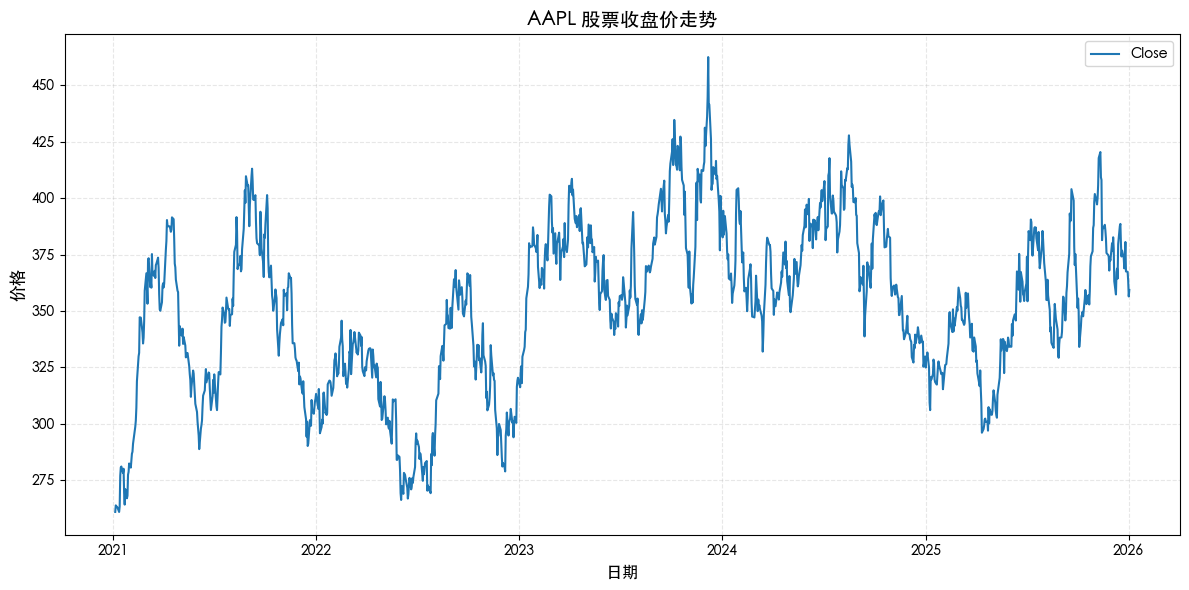

In [74]:
if 'data' in locals() and len(data) > 0:
    plot_price_trend(
        data,
        column='Close',
        title=f'{ticker} 股票收盘价走势',
        figsize=(12,6)
    )

## 4. 绘制K线图（需要mplfinance）

/Users/fang/Documents/Code/python-demo/stock-analysis/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/fang/Documents/Code/python-demo/stock-analysis/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


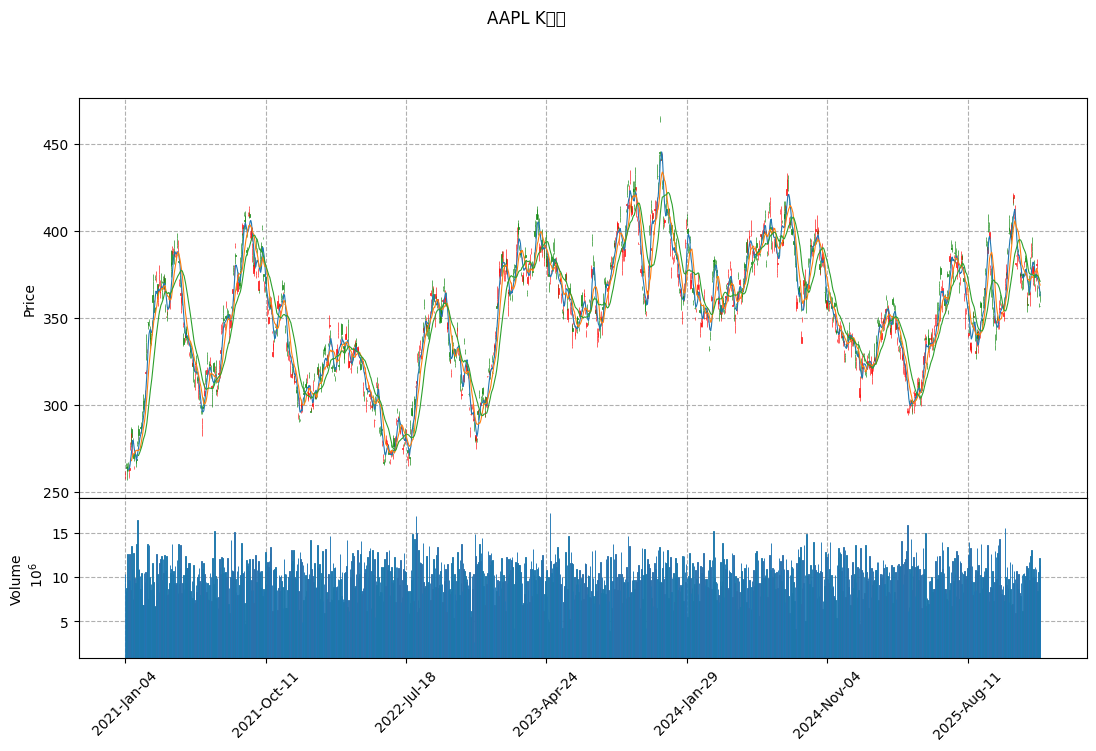

In [75]:
if 'data' in locals() and len(data) > 0:
    try:
        plot_candlestick(
            data,
            title=f'{ticker} K线图',
            mav=[5, 10, 20],
            volume=True
        )
    except Exception as e:
        print(f"K线图绘制失败: {e}")

## 5. 绘制技术指标

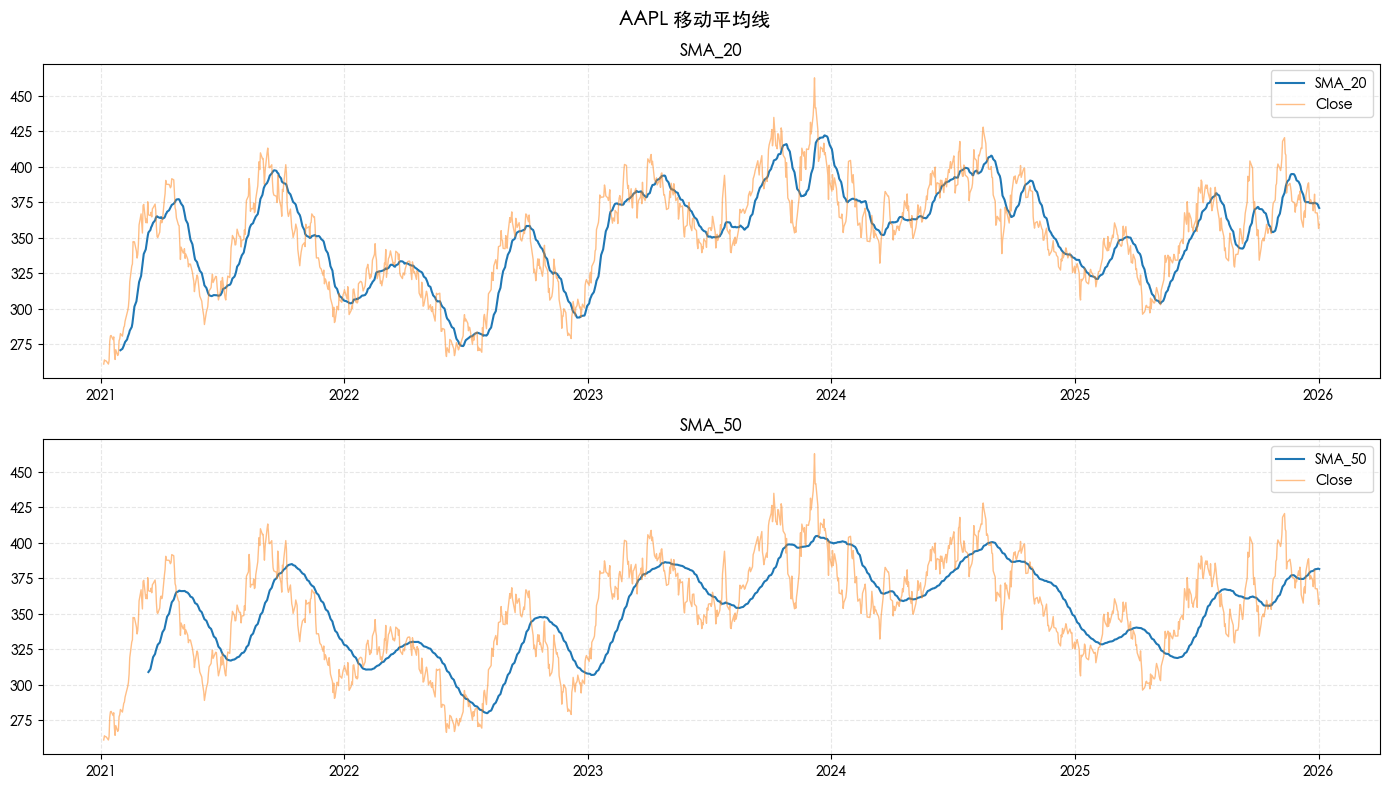

In [76]:
if 'data' in locals() and len(data) > 0:
    plot_technical_indicators(
        data,
        indicators=['SMA_20', 'SMA_50'],
        title=f'{ticker} 移动平均线',
        figsize=(14, 8)
    )

## 6. 绘制RSI指标

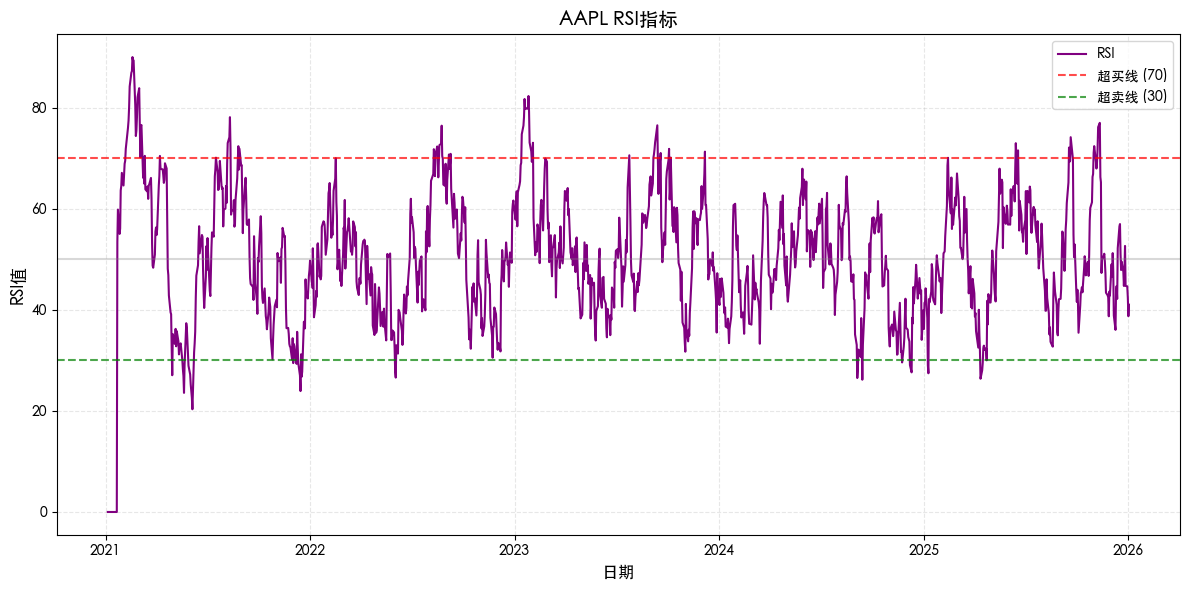

In [77]:
if 'data' in locals() and len(data) > 0:
    plot_rsi(
        data,
        rsi_column='RSI_14',
        title=f'{ticker} RSI指标',
        figsize=(12, 6)
    )

## 7. 绘制MACD指标

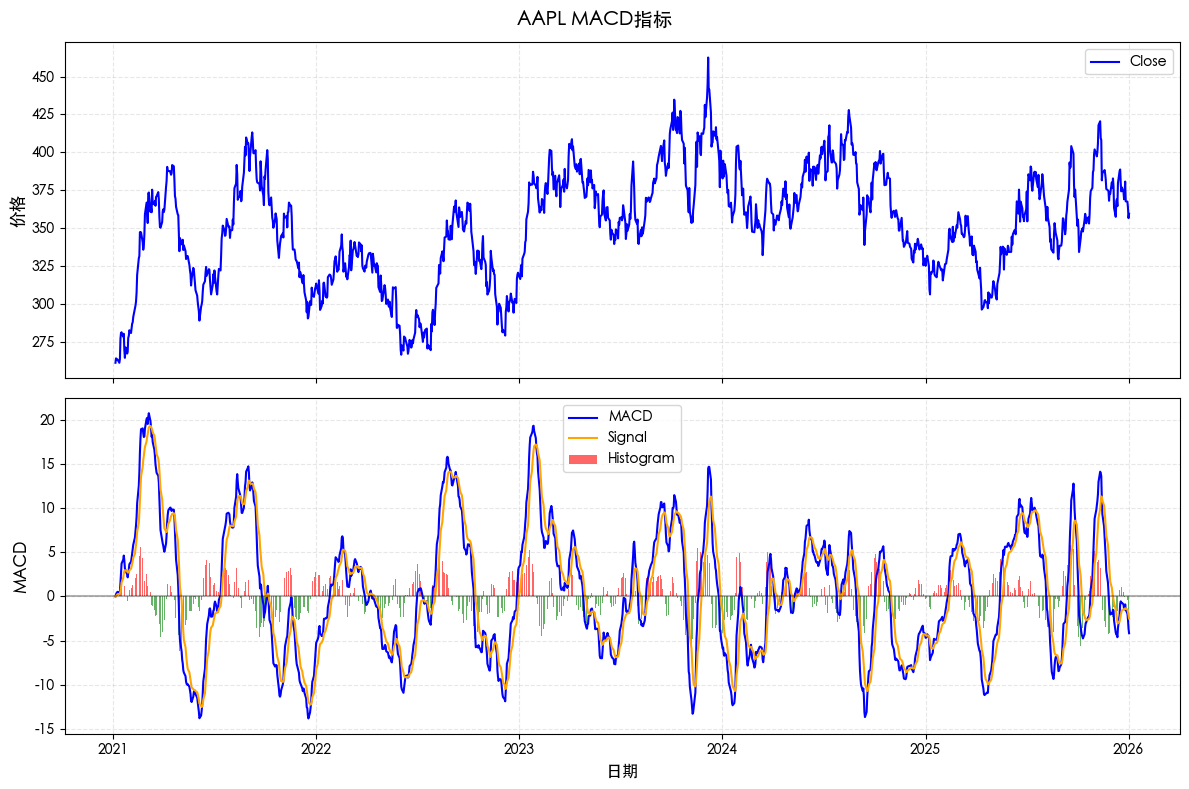

In [78]:
if 'data' in locals() and len(data) > 0:
    plot_macd(
        data,
        title=f'{ticker} MACD指标',
        figsize=(12, 8)
    )

## 8. 绘制布林带

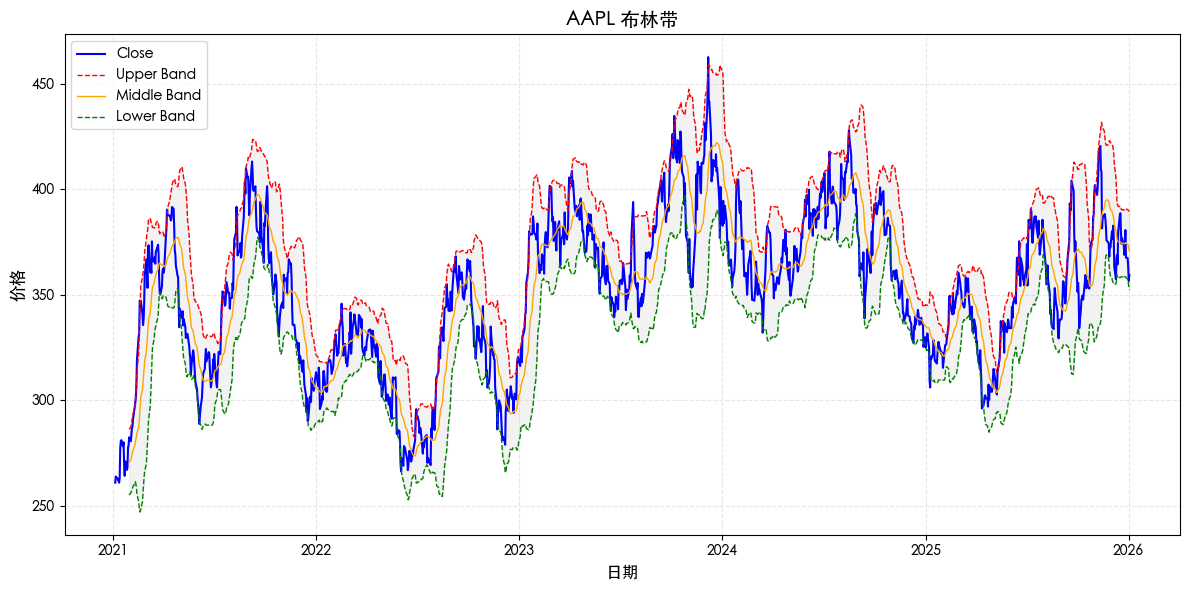

In [79]:
if 'data' in locals() and len(data) > 0:
    plot_bollinger_bands(
        data,
        title=f'{ticker} 布林带',
        figsize=(12, 6)
    )

## 9. 绘制收益率分布

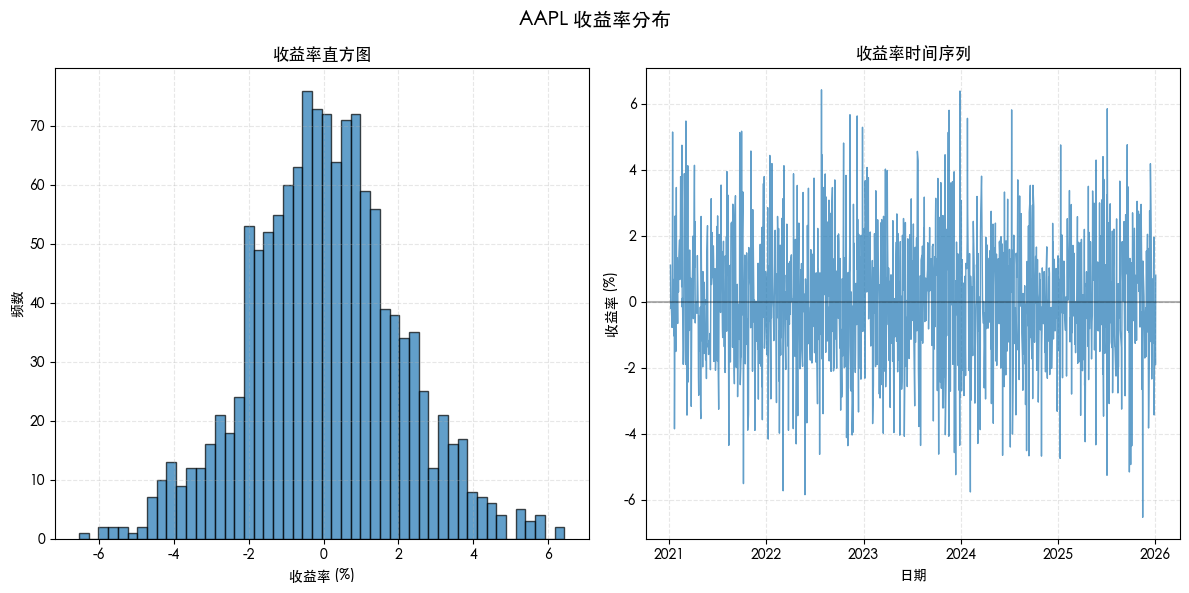

In [80]:
if 'data' in locals() and len(data) > 0:
    plot_returns_distribution(
        data,
        column='Daily_Change_Pct',
        title=f'{ticker} 收益率分布',
        figsize=(12, 6)
    )

## 10. 绘制成交量

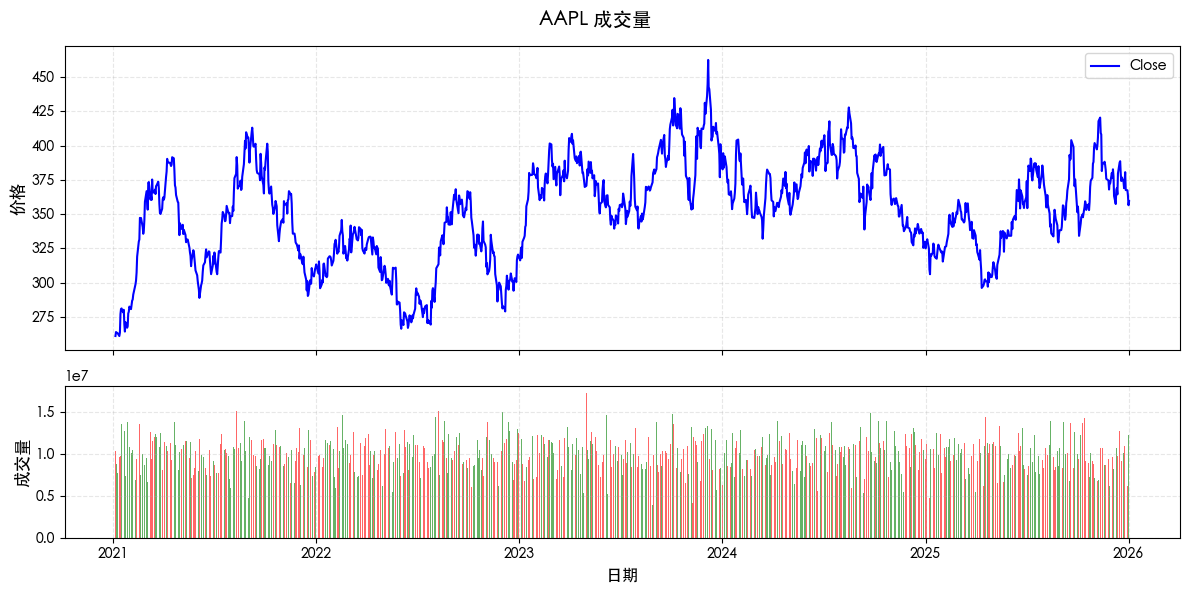

In [81]:
if 'data' in locals() and len(data) > 0:
    plot_volume(
        data,
        title=f'{ticker} 成交量',
        figsize=(12, 6)
    )

## 11. 绘制相关性热力图

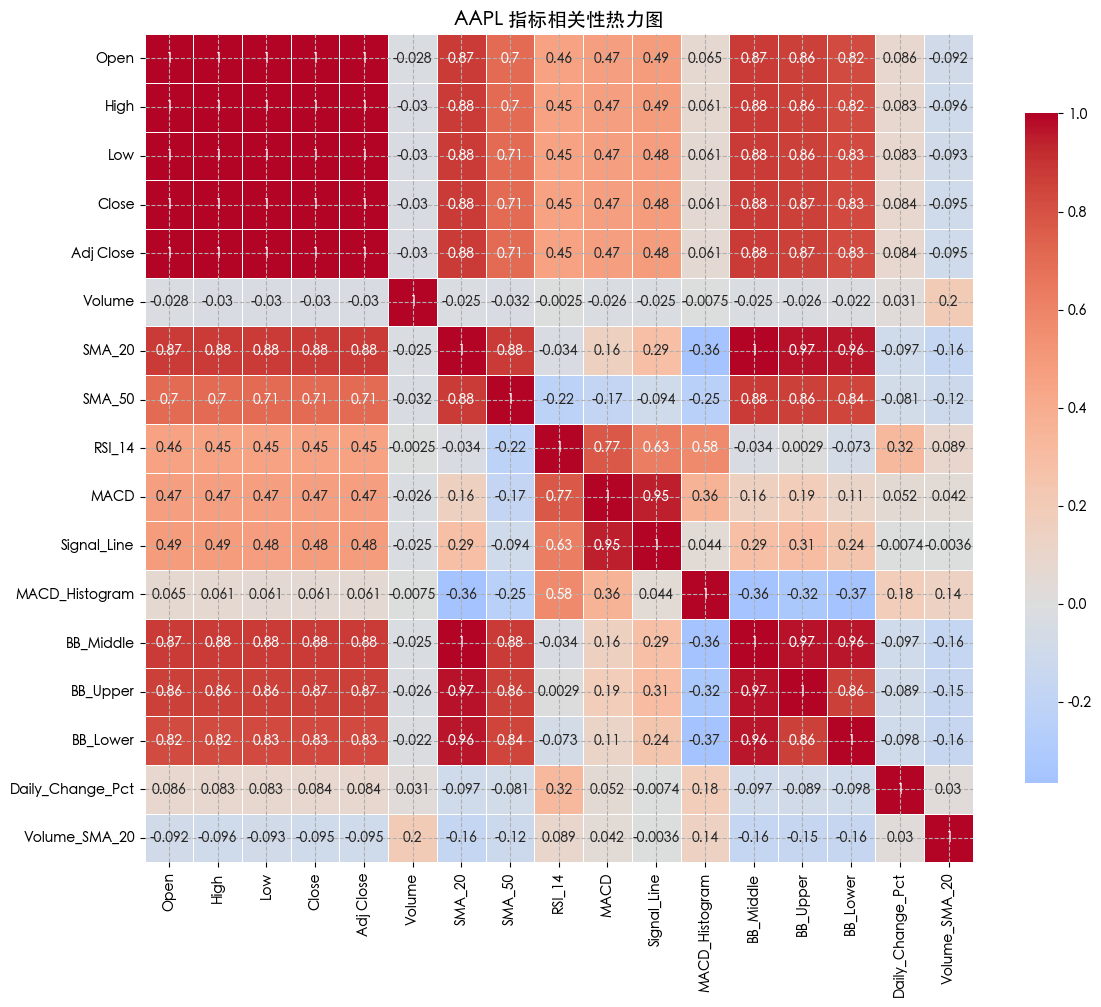

In [82]:
if 'data' in locals() and len(data) > 0:
    numeric_cols = data.select_dtypes(include=[np.number]).columns
    plot_correlation_heatmap(
        data[numeric_cols],
        title=f'{ticker} 指标相关性热力图',
        figsize=(12, 10)
    )

## 12. 综合分析图表

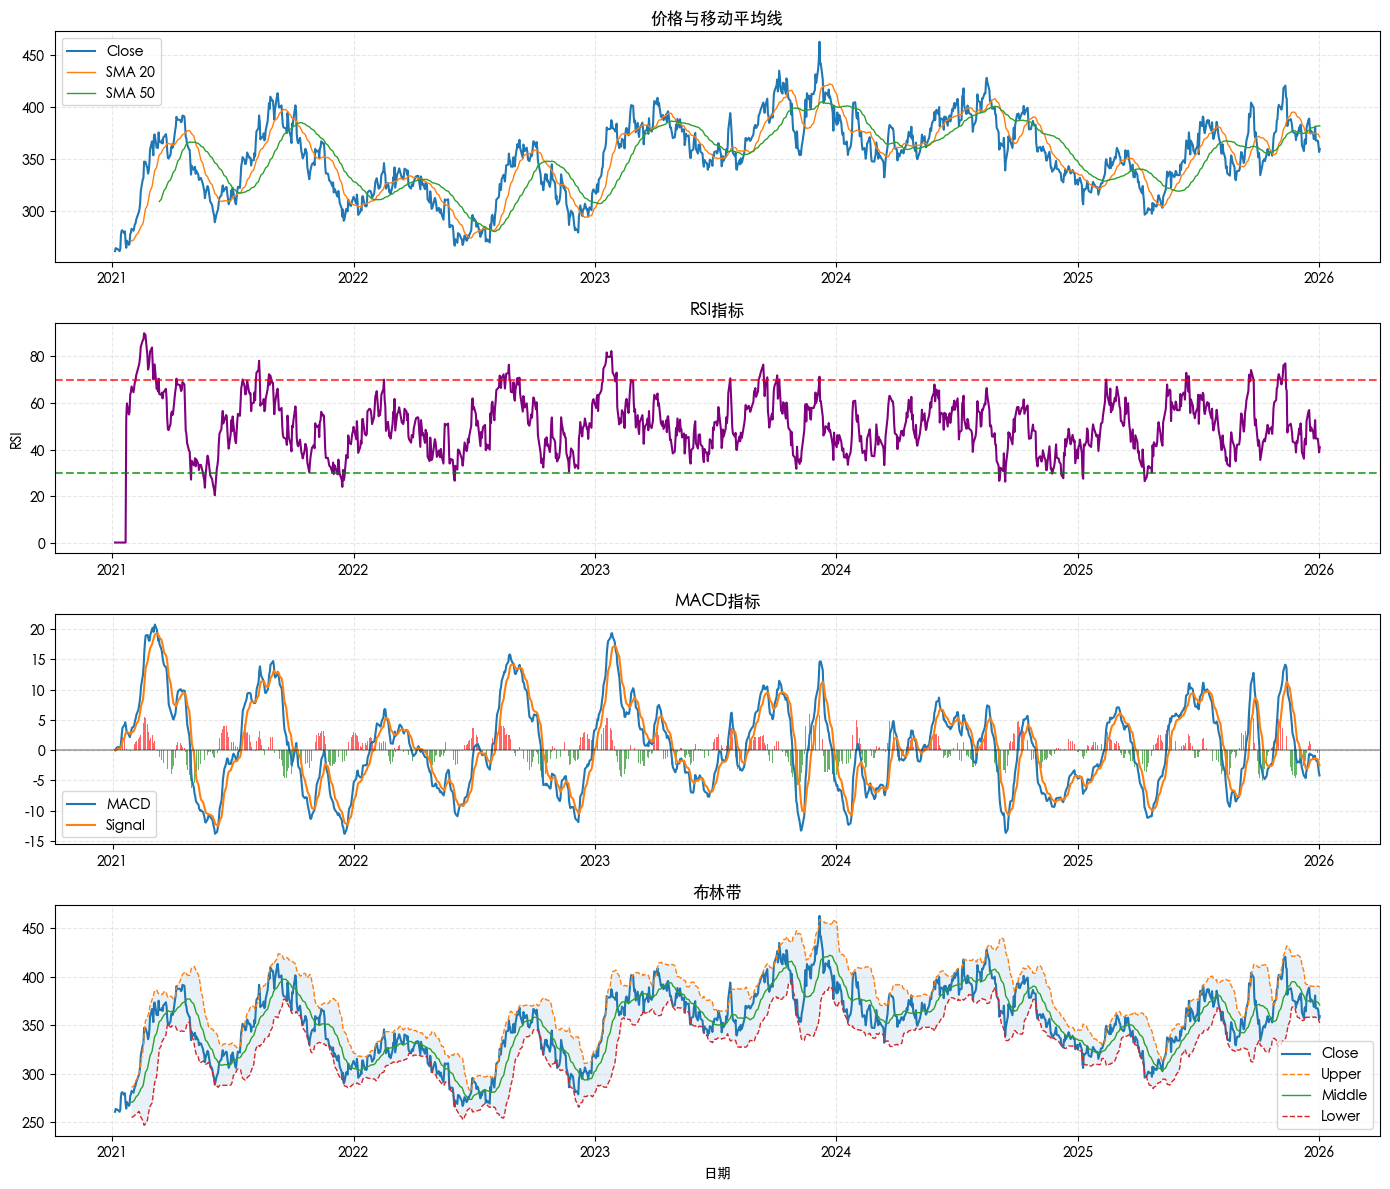

In [83]:
if 'data' in locals() and len(data) > 0:
    fig, axes = plt.subplots(4, 1, figsize=(14, 12))
    
    axes[0].plot(data.index, data['Close'], label='Close', linewidth=1.5)
    axes[0].plot(data.index, data['SMA_20'], label='SMA 20', linewidth=1)
    axes[0].plot(data.index, data['SMA_50'], label='SMA 50', linewidth=1)
    axes[0].set_title('价格与移动平均线')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    axes[1].plot(data.index, data['RSI_14'], label='RSI 14', linewidth=1.5, color='purple')
    axes[1].axhline(y=70, color='r', linestyle='--', alpha=0.7)
    axes[1].axhline(y=30, color='g', linestyle='--', alpha=0.7)
    axes[1].set_title('RSI指标')
    axes[1].set_ylabel('RSI')
    axes[1].grid(True, alpha=0.3)
    
    axes[2].plot(data.index, data['MACD'], label='MACD', linewidth=1.5)
    axes[2].plot(data.index, data['Signal_Line'], label='Signal', linewidth=1.5)
    colors = ['red' if x >= 0 else 'green' for x in data['MACD_Histogram']]
    axes[2].bar(data.index, data['MACD_Histogram'], color=colors, alpha=0.6)
    axes[2].axhline(y=0, color='black', linestyle='-', alpha=0.3)
    axes[2].set_title('MACD指标')
    axes[2].legend()
    axes[2].grid(True, alpha=0.3)
    
    axes[3].plot(data.index, data['Close'], label='Close', linewidth=1.5)
    axes[3].plot(data.index, data['BB_Upper'], label='Upper', linewidth=1, linestyle='--')
    axes[3].plot(data.index, data['BB_Middle'], label='Middle', linewidth=1)
    axes[3].plot(data.index, data['BB_Lower'], label='Lower', linewidth=1, linestyle='--')
    axes[3].fill_between(data.index, data['BB_Upper'], data['BB_Lower'], alpha=0.1)
    axes[3].set_title('布林带')
    axes[3].set_xlabel('日期')
    axes[3].legend()
    axes[3].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

## 13. 总结

本notebook完成了以下任务：
1. ✓ 加载股票数据并计算技术指标
2. ✓ 绘制价格走势图
3. ✓ 绘制K线图
4. ✓ 绘制移动平均线
5. ✓ 绘制RSI指标
6. ✓ 绘制MACD指标
7. ✓ 绘制布林带
8. ✓ 绘制收益率分布
9. ✓ 绘制成交量
10. ✓ 绘制相关性热力图
11. ✓ 创建综合分析图表

**注意**: 由于Yahoo Finance API限流，本notebook使用示例数据。如需下载真实数据，请稍后重试或使用其他数据源。

下一步：在下一个notebook中学习多股票分析。